In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from OptionPlayTranslator import *

In [83]:

# srcDataFrame = pd.read_csv('optionsDX/aapl_2022/aapl_eod_2022q4-86egbl/aapl_eod_202210.txt')
srcDataFrame = pd.read_csv('tslaReduced.csv')

df = pd.DataFrame(srcDataFrame)
df.columns = df.columns.str.strip()
df.columns

ticker = 'TSLA'

/var/folders/p_/r9zh86p106b8yh2ly8zzjbw00000gn/T/ipykernel_52129/3533934921.py:2: DtypeWarning: Columns (4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  srcDataFrame = pd.read_csv('tslaReduced.csv')


In [84]:
dayGroups = df.groupby('[QUOTE_DATE]')

In [85]:

opt = OPT('TSLA', dayGroups)
# print(opt.ticker)
# opt.find_plays(' 2019-10-01', ' 2020-01-16',200)

In [86]:
predictions = pd.read_csv('tsla_predictions.csv')
x = predictions.iloc[30]

# PLOT ALL OUTCOMES

In [87]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',100, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])

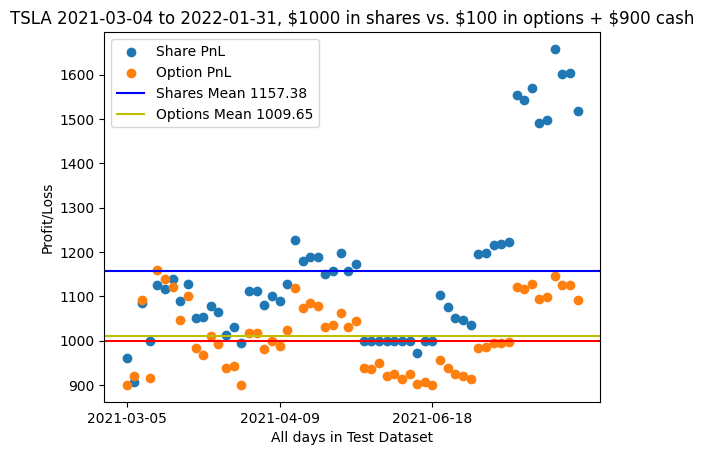

In [88]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title(f'{ticker} 2021-03-04 to 2022-01-31, $1000 in shares vs. $100 in options + $900 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('All days in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label=f'Shares Mean {round((np.mean(sharePnL)),2)}')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label=f'Options Mean {round((np.mean(optionPnL)),2)}')
plt.legend()

In [122]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])


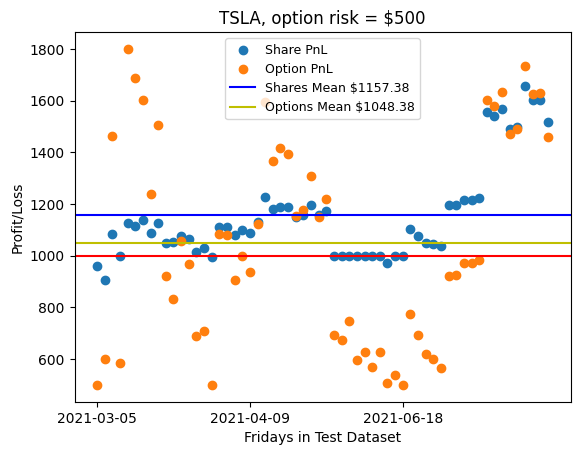

In [123]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA, option risk = $500')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
shareMean = round((np.mean(sharePnL)),2)
optionMean = round((np.mean(optionPnL)),2)
plt.axhline(y=shareMean, color='b', linestyle='-', label=f'Shares Mean ${shareMean}')
plt.axhline(y=optionMean, color='y', linestyle='-', label=f'Options Mean ${optionMean}')
plt.legend(fontsize='9')
# plt.grid(True)


In [190]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_returns = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    # pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    # cur = date(*pred_list)
    # if cur.weekday() == 4:
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])
        predicted_returns.append(play[3])

In [191]:
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

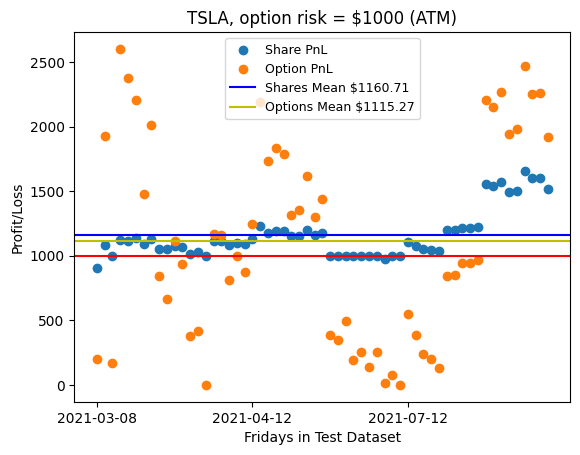

In [192]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA, option risk = $1000 (ATM)')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
shareMean = round((np.mean(sharePnL)),2)
optionMean = round((np.mean(optionPnL)),2)
plt.axhline(y=shareMean, color='b', linestyle='-', label=f'Shares Mean ${shareMean}')
plt.axhline(y=optionMean, color='y', linestyle='-', label=f'Options Mean ${optionMean}')
plt.legend(fontsize='9')
# plt.grid(True)

# PICKING SHARES OR OPTIONS BASED ON PREDICTED RETURNS

# CHOOSE HIGHER

In [255]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []
share_or_option = []

# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
        share_or_option.append('neither')
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        share_or_option.append('shares')
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        share_or_option.append('options')


In [256]:
share_or_option

['shares',
 'shares',
 'shares',
 'shares',
 'shares',
 'shares',
 'neither',
 'neither',
 'shares',
 'shares',
 'shares',
 'shares']

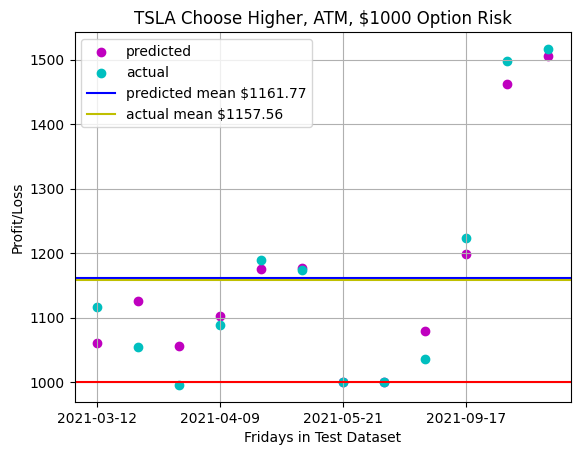

In [257]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
# plt.scatter(pred_dates, share_or_option, label='0:Opt, 100:Shr, 200:Neither', )
# plt.scatter(np.zeros(len(markers)), np.zeros(len(markers)), label='choose shares', marker='d', color='black')

plt.title('TSLA Choose Higher, ATM, $1000 Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

# At the Money (ATM) vs. Find Best Strike (Options Only)

In [258]:
#hyperparameters
risk = 1000
strike_strat = 'FIND_BEST_STRIKE'
ticker = 'TSLA'

In [259]:
########## ATM ##########

pred_dates = []
ATM_actual = []
ATM_predicted = []

for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
        if play is not None:
            ATM_actual.append(play[1])
            pred_dates.append(pred['Date'])
            ATM_predicted.append(play[4])
            # if play[4] < 1000: # predicted option P/L
            #     ATM_predicted.append(1000) # do nothing
            # else: 
            #     ATM_predicted.append(play[4])
print('ATM_Actual',ATM_actual)
print('ATM_predited',ATM_predicted)

# ATM_actual = []

# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
# predicted_PnL_options = predicted_PnL_options[1:]
# optionPnL = optionPnL[1:]
# pred_dates = pred_dates[1:]




######### FIND_BEST_STRIKE ############
FBS_actual = []
FBS_predicted = []

for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'FIND_BEST_STRIKE',500, False, False))
        if play is not None:
            FBS_actual.append(play[1])
            FBS_predicted.append(play[4]) #uncomment to turn off smoothing

            # if play[4] < 1000:
            #     FBS_predicted.append(1000)
            # else: 
            #     FBS_predicted.append(play[4])
            

print('FBS_actual',FBS_actual)
print('FBS_predicted',FBS_predicted)



ATM_Actual [500.93, 1689.35, 833.8399999999999, 500.0, 938.61, 1394.2, 1218.42, 627.08, 500.15, 566.27, 984.51, 1490.4299999999998, 1458.83]
ATM_predited [2543.0841463999977, 605.1465547999996, 969.0995563999995, 340.6168820000006, 519.6156234400003, 855.3385191999996, 768.0572398999999, -86.09725824999975, -3.34346620000008, 194.28012950000004, 428.63317502000007, 918.8998715, 945.5609104]
FBS_actual [500.0, 1689.35, 836.6, 500.0, 938.61, 1394.2, 1218.42, 627.08, 500.15, 566.27, 984.51, 1490.4299999999998, 1458.83]
FBS_predicted [5006.20004269999, 605.1465547999996, 976.1818489999996, 340.6168820000006, 519.6156234400003, 855.3385191999996, 768.0572398999999, -86.09725824999975, -3.34346620000008, 194.28012950000004, 428.63317502000007, 918.8998715, 945.5609104]


In [260]:
len(pred_dates)

13

In [261]:
FBS_actual = FBS_actual[1:]
FBS_predicted = FBS_predicted[1:]
ATM_actual = ATM_actual[1:]
ATM_predicted = ATM_predicted[1:]
pred_dates = pred_dates[1:]



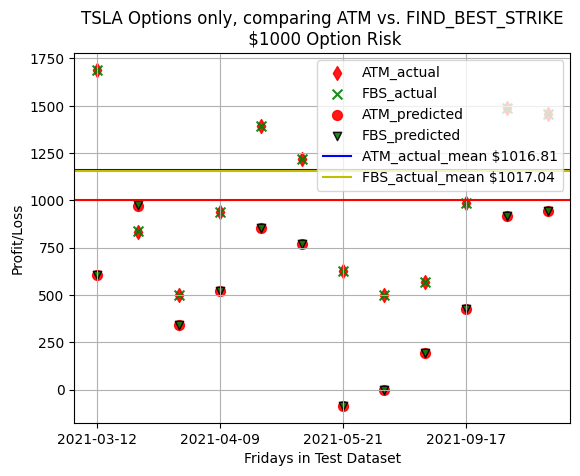

In [262]:
plt.scatter(pred_dates, ATM_actual, label='ATM_actual', color='r', marker='d', alpha=.9, s=50)

plt.scatter(pred_dates, FBS_actual, label='FBS_actual', color='g', marker='x', alpha=.9, s=50)

plt.scatter(pred_dates, ATM_predicted, label='ATM_predicted', color='r', marker='o', alpha=.9,s=50)# s=12)

plt.scatter(pred_dates, FBS_predicted, label='FBS_predicted', color='g', marker='v', edgecolors='black', alpha=.9,)# s=12)

plt.title(f'{ticker} Options only, comparing ATM vs. FIND_BEST_STRIKE\n ${risk} Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
ATM_actual_mean = round((np.mean(ATM_actual)),2)
FBS_actual_mean =round(( np.mean(FBS_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'ATM_actual_mean ${ATM_actual_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'FBS_actual_mean ${FBS_actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
# plt.legend( fontsize= "8", loc="upper left",)
plt.grid(True)


Choose Higher, 1000, Find Best Strike (doesn't show anything)

In [263]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),{strike_strat},risk, 'FIND_BEST_STRIKE', False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []


# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        


TSLA on  2021-03-04 predicted to be 679.9309 on  2021-03-05
Predicted: baseline return: 9.375% P/L:$1093. Predicted Option return: 309.0% P/L: $4086.
Actual: baseline (shares): -3.885% P/L:$961.  Option PnL: -99.815% P/L: $1. Result for options:$-959.3


TSLA on  2021-03-04 predicted to be 659.6749 on  2021-03-12
Predicted: baseline return: 6.117% P/L:$1061. Predicted Option return: -79.0% P/L: $210.
Actual: baseline (shares): 11.613% P/L:$1116.  Option PnL: 137.871% P/L: $2378. Result for options:$1262.58


TSLA on  2021-03-04 predicted to be 699.60236 on  2021-03-19
Predicted: baseline return: 12.54% P/L:$1125. Predicted Option return: -6.0% P/L: $938.
Actual: baseline (shares): 5.4% P/L:$1054.  Option PnL: -33.229% P/L: $667. Result for options:$-386.29


TSLA on  2021-03-04 predicted to be 656.2344 on  2021-03-26
Predicted: baseline return: 5.563% P/L:$1055. Predicted Option return: -132.0% P/L: $-318.
Actual: baseline (shares): -0.454% P/L:$995.  Option PnL: -100.0% P/L: $0. Resu

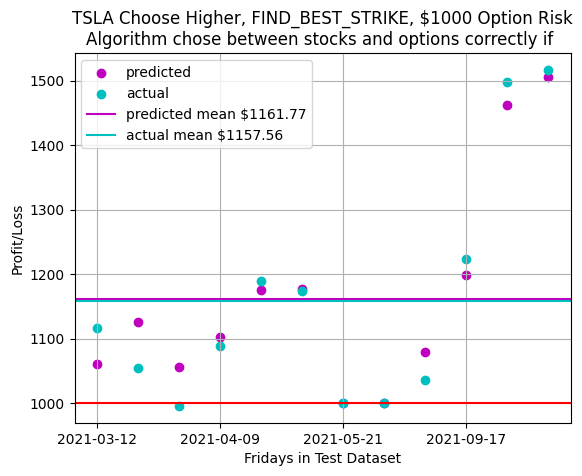

In [264]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
plt.title(f'{ticker} Choose Higher, {strike_strat}, ${risk} Option Risk\nAlgorithm chose between stocks and options correctly if ')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))


ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='m', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='c', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

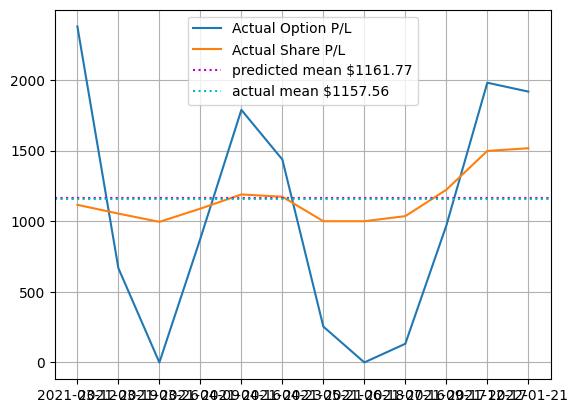

In [265]:
plt.plot(pred_dates, optionPnL, label='Actual Option P/L')
plt.plot(pred_dates, sharePnL, label='Actual Share P/L')

OptionPnL_Mean = round((np.mean(optionPnL)),2)
sharePnL_Mean =round(( np.mean(sharePnL)),2)

plt.axhline(y=predicted_mean, color='m', linestyle='dotted', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='c', linestyle='dotted', label = f'actual mean ${actual_mean}')
plt.legend()
plt.grid(True)

same as above but slightly more in depth. doesnt show FIND_BEST_STRIKE because shares always getting chosen

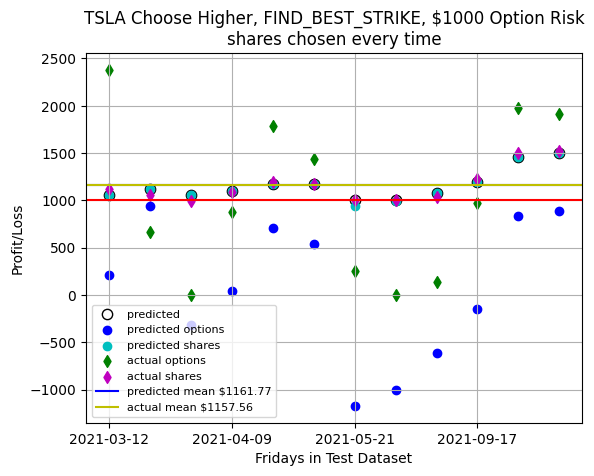

In [266]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', edgecolors='black', color='white',s=55)
plt.scatter(pred_dates, predicted_PnL_options, label='predicted options', color='b', marker='o',)
plt.scatter(pred_dates, predicted_PnL_shares, label='predicted shares', color='c', marker='o' )
plt.scatter(pred_dates, optionPnL, label='actual options', color='g', marker='d')
plt.scatter(pred_dates, sharePnL, label='actual shares', color='m', marker='d')

# plt.scatter(pred_dates, choose_higher_actual, label='actual', color='y', s=10)
plt.title(f'{ticker} Choose Higher, FIND_BEST_STRIKE, ${risk} Option Risk\nshares chosen every time')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
# plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
# plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
# plt.legend()
plt.legend( fontsize= "8",)
plt.grid(True)
